In [88]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import time
from sklearn.neighbors import NearestNeighbors

In [89]:
links = pd.read_csv('links.csv')
Raw_movie = pd.read_csv('movies.csv')
rating = pd.read_csv('ratings.csv')
tag = pd.read_csv('tags.csv')

In [90]:
####rating 과 movie가지고 테이블 만들기 index= user,column =영화,element=평점

In [91]:
movie_matrix = rating.pivot(index='userId' ,columns='movieId', values='rating')

In [92]:
#nan 값 0으로채우기
movie_matrix = movie_matrix.fillna(0)

In [94]:
movie_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
##dataframe 을 np로바꾸기
datMat = np.array(movie_matrix)
datMat[0,:]

array([0., 0., 0., ..., 0., 0., 0.])

In [96]:
####NearestNeighbors 메소드의 파라미터를 적절히 tuning 하여 
####제시된 검증 방법에 따라서 가장 높은 성능을 내는 파라미터 찾은 후 
####ipynb 파일에 결과값 출력

In [97]:
#실험삼아 k=5 radius =0.4인경우
neigh = NearestNeighbors(5,0.4)
neigh.fit(datMat)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=0.4)

In [98]:
##실험삼아 7번 user와 가장가까운 5개 뽑아보기 
neigh.kneighbors([datMat[6]], 5, return_distance=False)

array([[  6, 632, 107, 394, 236]])

In [99]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(5,0.4,metric = 'euclidean', algorithm = 'auto')
knn.fit(datMat)


NearestNeighbors(algorithm='auto', leaf_size=30, metric='euclidean',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=0.4)

In [100]:
dic = ['Animation',
 'Crime',
 'Musical',
 'Adventure',
 'Fantasy',
 'Documentary',
 'Sci-Fi',
 'Comedy',
 'Mystery',
 'Horror',
 'Thriller',
 'Romance',
 'IMAX',
 'War',
 '(no genres listed)',
 'Action',
 'Film-Noir',
 'Children',
 'Western',
 'Drama']

In [101]:
index_movie = movie_matrix.columns

In [102]:
num_neighbor = 10
test_num = 100
correct = 0



for c in range(test_num):
    query_index = np.random.choice(datMat.shape[0])
    _, indices = knn.kneighbors(datMat[query_index, :].\
                                       reshape(1,-1),n_neighbors=num_neighbor)

    true_label = list()
    test_label = list()
    a = list()
    for i in range(num_neighbor):
        movie = Raw_movie[Raw_movie['movieId'] == index_movie[int(indices[:,i])]]
        print(movie)
        if i == 0:
            t = movie['genres'][movie.index[0]].split('|')
            for j in range(len(t)):
                true_label.append(t[j])
        else:
            t = movie['genres'][movie.index[0]].split('|')
            for j in range(len(t)):
                test_label.append(t[j])                
        if i == num_neighbor-1:
            max_count= 0
            max_idx = 0
            for k in range(len(dic)):
                if max_count < test_label.count(dic[k]):
                    max_count = test_label.count(dic[k])
                    max_idx = k
            for p in range(len(true_label)):
                if true_label[p] == dic[max_idx]:

                    correct += 1
print(correct/test_num)

     movieId                   title  genres
227      255  Jerky Boys, The (1995)  Comedy
     movieId                  title        genres
447      500  Mrs. Doubtfire (1993)  Comedy|Drama
     movieId        title                         genres
346      382  Wolf (1994)  Drama|Horror|Romance|Thriller
     movieId                                    title          genres
578      678  Some Folks Call It a Sling Blade (1993)  Drama|Thriller
     movieId                 title                genres
336      372  Reality Bites (1994)  Comedy|Drama|Romance
     movieId              title          genres
428      481  Kalifornia (1993)  Drama|Thriller
     movieId              title            genres
100      110  Braveheart (1995)  Action|Drama|War
     movieId          title                 genres
650      786  Eraser (1996)  Action|Drama|Thriller
     movieId                  title         genres
324      360  I Love Trouble (1994)  Action|Comedy
    movieId                               

318      353  Crow, The (1994)  Action|Crime|Fantasy|Thriller
     movieId                 title  genres
190      216  Billy Madison (1995)  Comedy
     movieId                            title          genres
439      492  Manhattan Murder Mystery (1993)  Comedy|Mystery
     movieId                title          genres
107      118  If Lucy Fell (1996)  Comedy|Romance
     movieId              title          genres
428      481  Kalifornia (1993)  Drama|Thriller
     movieId                                    title          genres
578      678  Some Folks Call It a Sling Blade (1993)  Drama|Thriller
    movieId                    title       genres
34       36  Dead Man Walking (1995)  Crime|Drama
     movieId                  title         genres
324      360  I Love Trouble (1994)  Action|Comedy
   movieId             title                                       genres
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
     movieId              title  genres
22

578      678  Some Folks Call It a Sling Blade (1993)  Drama|Thriller
   movieId             title                                       genres
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
     movieId              title          genres
428      481  Kalifornia (1993)  Drama|Thriller
    movieId                    title       genres
34       36  Dead Man Walking (1995)  Crime|Drama
     movieId                  title         genres
324      360  I Love Trouble (1994)  Action|Comedy
     movieId              title  genres
220      248  Houseguest (1994)  Comedy
     movieId                              title  genres
309      344  Ace Ventura: Pet Detective (1994)  Comedy
     movieId              title     genres
633      760  Stalingrad (1993)  Drama|War
     movieId               title                 genres
208      236  French Kiss (1995)  Action|Comedy|Romance
     movieId                                              title genres
442      495  In the Re

     movieId             title genres
193      219  Cure, The (1995)  Drama
     movieId          title                   genres
665      810  Kazaam (1996)  Children|Comedy|Fantasy
     movieId                   title          genres
661      805  Time to Kill, A (1996)  Drama|Thriller
     movieId           title        genres
150      171  Jeffrey (1995)  Comedy|Drama
     movieId                    title genres
306      341  Double Happiness (1994)  Drama
     movieId                 title genres
582      685  It's My Party (1996)  Drama
     movieId                title                       genres
266      296  Pulp Fiction (1994)  Comedy|Crime|Drama|Thriller
     movieId                  title                   genres
391      442  Demolition Man (1993)  Action|Adventure|Sci-Fi
     movieId                title            genres
634      761  Phantom, The (1996)  Action|Adventure
     movieId                                    title          genres
578      678  Some Folks Call 

     movieId              title  genres
220      248  Houseguest (1994)  Comedy
     movieId                              title  genres
309      344  Ace Ventura: Pet Detective (1994)  Comedy
     movieId               title                 genres
208      236  French Kiss (1995)  Action|Comedy|Romance
     movieId                  title               genres
134      155  Beyond Rangoon (1995)  Adventure|Drama|War
     movieId                       title               genres
295      330  Tales from the Hood (1995)  Action|Crime|Horror
     movieId                                    title          genres
578      678  Some Folks Call It a Sling Blade (1993)  Drama|Thriller
     movieId              title          genres
428      481  Kalifornia (1993)  Drama|Thriller
     movieId        title        genres
637      765  Jack (1996)  Comedy|Drama
   movieId             title                                       genres
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fa

     movieId                title          genres
107      118  If Lucy Fell (1996)  Comedy|Romance
     movieId        title          genres
224      252  I.Q. (1994)  Comedy|Romance
     movieId                 title  genres
190      216  Billy Madison (1995)  Comedy
     movieId              title genres
374      424  Blue Chips (1994)  Drama
     movieId                          title  genres
113      125  Flirting With Disaster (1996)  Comedy
     movieId                    title                genres
316      351  Corrina, Corrina (1994)  Comedy|Drama|Romance
    movieId                     title           genres
81       87  Dunston Checks In (1996)  Children|Comedy
     movieId                         title                            genres
143      164  Devil in a Blue Dress (1995)  Crime|Film-Noir|Mystery|Thriller
     movieId             title                 genres
656      800  Lone Star (1996)  Drama|Mystery|Western
     movieId                                   title  \


     movieId                                   title          genres
534      606  Candyman: Farewell to the Flesh (1995)  Fantasy|Horror
     movieId              title          genres
248      276  Milk Money (1994)  Comedy|Romance
     movieId                              title                 genres
144      165  Die Hard: With a Vengeance (1995)  Action|Crime|Thriller
     movieId                                       title  \
102      112  Rumble in the Bronx (Hont faan kui) (1995)   

                            genres  
102  Action|Adventure|Comedy|Crime  
     movieId              title          genres
428      481  Kalifornia (1993)  Drama|Thriller
     movieId                                    title          genres
578      678  Some Folks Call It a Sling Blade (1993)  Drama|Thriller
     movieId                 title                genres
336      372  Reality Bites (1994)  Comedy|Drama|Romance
     movieId                       title         genres
169      191  Scarlet L

     movieId              title  genres
220      248  Houseguest (1994)  Comedy
     movieId           title  genres
505      564  Chasers (1994)  Comedy
    movieId                              title                genres
54       58  Postman, The (Postino, Il) (1994)  Comedy|Drama|Romance
    movieId              title                 genres
43       45  To Die For (1995)  Comedy|Drama|Thriller
     movieId                  title  \
328      364  Lion King, The (1994)   

                                              genres  
328  Adventure|Animation|Children|Drama|Musical|IMAX  
     movieId                     title  \
489      546  Super Mario Bros. (1993)   

                                              genres  
489  Action|Adventure|Children|Comedy|Fantasy|Sci-Fi  
     movieId                       title         genres
458      512  Puppet Masters, The (1994)  Horror|Sci-Fi
    movieId              title  genres
17       18  Four Rooms (1995)  Comedy
     movieId              

     movieId               title            genres
571      665  Underground (1995)  Comedy|Drama|War
     movieId                 title genres
582      685  It's My Party (1996)  Drama
     movieId              title          genres
428      481  Kalifornia (1993)  Drama|Thriller
     movieId                 title              genres
642      778  Trainspotting (1996)  Comedy|Crime|Drama
     movieId                                    title          genres
578      678  Some Folks Call It a Sling Blade (1993)  Drama|Thriller
     movieId                  title                   genres
391      442  Demolition Man (1993)  Action|Adventure|Sci-Fi
     movieId          title    genres
437      490  Malice (1993)  Thriller
     movieId                  title          genres
115      129  Pie in the Sky (1996)  Comedy|Romance
     movieId                title            genres
634      761  Phantom, The (1996)  Action|Adventure
     movieId              title                   genres
577  

    movieId                                        title          genres
74       80  White Balloon, The (Badkonake sefid) (1995)  Children|Drama
     movieId                  title        genres
447      500  Mrs. Doubtfire (1993)  Comedy|Drama
     movieId        title                         genres
346      382  Wolf (1994)  Drama|Horror|Romance|Thriller
     movieId                         title  genres
409      460  Getting Even with Dad (1994)  Comedy
     movieId                                    title          genres
578      678  Some Folks Call It a Sling Blade (1993)  Drama|Thriller
     movieId              title          genres
428      481  Kalifornia (1993)  Drama|Thriller
     movieId                  title          genres
115      129  Pie in the Sky (1996)  Comedy|Romance
     movieId                 title                genres
336      372  Reality Bites (1994)  Comedy|Drama|Romance
    movieId                               title        genres
78       84  Last Summ

In [118]:
#시각화 기법 및 최적의 파라미터찾기 
#1)k값 변환해보기
k_num = []
accuracy = []
for z in range(1,15):
    knn = NearestNeighbors(i,0.4,metric = 'euclidean', algorithm = 'auto')
    
    knn.fit(datMat)
    num_neighbor = 10
    test_num = 100
    correct = 0



    for c in range(test_num):
        query_index = np.random.choice(datMat.shape[0])
        _, indices = knn.kneighbors(datMat[query_index, :].\
                                       reshape(1,-1),n_neighbors=num_neighbor)

        true_label = list()
        test_label = list()
        a = list()
        for i in range(num_neighbor):
            movie = Raw_movie[Raw_movie['movieId'] == index_movie[int(indices[:,i])]]
            #print(movie)
            if i == 0:
                t = movie['genres'][movie.index[0]].split('|')
                for j in range(len(t)):
                    true_label.append(t[j])
            else:
                t = movie['genres'][movie.index[0]].split('|')
                for j in range(len(t)):
                    test_label.append(t[j])                
            if i == num_neighbor-1:
                max_count= 0
                max_idx = 0
                for k in range(len(dic)):
                    if max_count < test_label.count(dic[k]):
                        max_count = test_label.count(dic[k])
                        max_idx = k
                for p in range(len(true_label)):
                    if true_label[p] == dic[max_idx]:

                        correct += 1
    k_num.append(z)
    accuracy.append(correct/test_num)


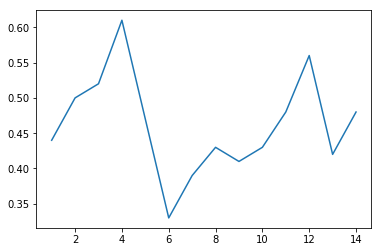

In [104]:
x = k_num
y = accuracy
plt.plot(x,y)

#k가  4일때 최고의 accuracy가짐

In [116]:
#radius 조절해서 해보기
#시각화 기법 및 최적의 파라미터찾기 
#1)k값 변환해보기
radius = []
accuracy = []
import numpy
radius_list = numpy.arange(0,2,0.1)
for z in radius_list:
    knn = NearestNeighbors(4,z,metric = 'euclidean', algorithm = 'auto')
    
    knn.fit(datMat)
    num_neighbor = 10
    test_num = 100
    correct = 0



    for c in range(test_num):
        query_index = np.random.choice(datMat.shape[0])
        _, indices = knn.kneighbors(datMat[query_index, :].\
                                       reshape(1,-1),n_neighbors=num_neighbor)

        true_label = list()
        test_label = list()
        a = list()
        for i in range(num_neighbor):
            movie = Raw_movie[Raw_movie['movieId'] == index_movie[int(indices[:,i])]]
            #print(movie)
            if i == 0:
                t = movie['genres'][movie.index[0]].split('|')
                for j in range(len(t)):
                    true_label.append(t[j])
            else:
                t = movie['genres'][movie.index[0]].split('|')
                for j in range(len(t)):
                    test_label.append(t[j])                
            if i == num_neighbor-1:
                max_count= 0
                max_idx = 0
                for k in range(len(dic)):
                    if max_count < test_label.count(dic[k]):
                        max_count = test_label.count(dic[k])
                        max_idx = k
                for p in range(len(true_label)):
                    if true_label[p] == dic[max_idx]:

                        correct += 1
    radius.append(z)
    accuracy.append(correct/test_num)


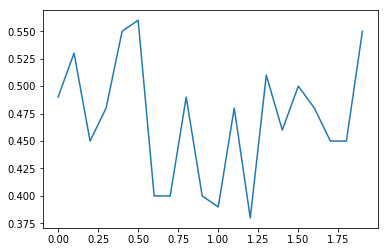

In [117]:
x = radius
y = accuracy
plt.plot(x,y)
#radius가  0.5일때 최고의 accuracy가짐


In [ ]:
## 따라서 k=4 radius가 1.5일 때 accuracy는 0.55이상으로 나온다!!!!!

In [ ]:
## random choice임으로 뽑을 때마다 k와 radius의 최적의 값이 다르게 나온다 
##따라서 의미가 별로 없는 것 같다.